In [1]:
!pip install tensorflow_decision_forests
!pip install keras
!pip install --upgrade tensorflow_decision_forests


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 34.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import tensorflow  as tf
import tensorflow_decision_forests as tfdf
import keras
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
import tensorflow_decision_forests as tfdf

from collections import Counter

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the data from the files
pat_1 = pd.read_csv('/content/drive/MyDrive/ml_assinments/assin_2/MIMIC/221.csv')
pat_2 = pd.read_csv('/content/drive/MyDrive/ml_assinments/assin_2/MIMIC/230.csv')

print(pat_1.head())
print(pat_2.head())

   RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    28    81   120    98  74     73        0
1    29    81   120    98  74     73        0
2    30    81   120    98  74     73        0
3    30    81   120    99  74     73        0
4    29    81   120    99  73     73        0
   RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    15    54    73    97  72     71        0
1    15    54    73    97  72     71        0
2    15    54    73    97  72     71        0
3    15    54    73    97  72     71        0
4    15    55    74    97  72     71        0


#Data Preprocessing

In [5]:
#TODO: preprocessing data exploration and preprocessing. Employ techniques such as data cleaning, normalization, feature engineering, and outlier detection to enhance data quality and identify relevant patterns
# do on pat_1 and pat_2, and then split into y and y


In [6]:
#data exploration

# Check for missing values
print("Patient 1")
print(pat_1.isnull().sum())
print("Patient 2")
print(pat_2.isnull().sum())

#data statistics
print(pat_1.describe())
print(pat_2.describe())

print(pat_1.head())
print(pat_2.head())

Patient 1
RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64
Patient 2
RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64
               RESP          BP-S          BP-D          SpO2            HR  \
count  24999.000000  24999.000000  24999.000000  24999.000000  24999.000000   
mean      23.763951     83.889756    121.411656     99.041282     88.562342   
std        4.492832      4.746617      8.966590      1.304528      9.592311   
min        0.000000     66.000000     88.000000      0.000000      0.000000   
25%       21.000000     81.000000    114.000000     98.000000     81.000000   
50%       23.000000     83.000000    121.000000     99.000000     88.000000   
75%       26.000000     87.000000    129.000000    100.000000     95.000000   
max       42.000000    127.000000    170.000000    100.000000    120.000000   

              PULSE       Anomaly  
count  24999.000000  249

In [7]:
#data preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
def preprocess_data(df):
    df.fillna(df.mean(), inplace=True)  # Fill missing values with column mean
    # Standardize the features
    scaler = StandardScaler()
    features = df.drop('Anomaly', axis=1)  # Assuming 'Anomaly' is the target column
    scaled_features = scaler.fit_transform(features)
    df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
    df_scaled['Anomaly'] = df['Anomaly']  # Add target variable back
    return df_scaled

pat_1=preprocess_data(pat_1)
pat_2=preprocess_data(pat_2)

print(pat_1.head())
print(pat_2.head())




       RESP      BP-S      BP-D      SpO2        HR     PULSE  Anomaly
0  0.942865 -0.608815 -0.157438 -0.798222 -1.518157 -1.624295        0
1  1.165446 -0.608815 -0.157438 -0.798222 -1.518157 -1.624295        0
2  1.388028 -0.608815 -0.157438 -0.798222 -1.518157 -1.624295        0
3  1.388028 -0.608815 -0.157438 -0.031646 -1.518157 -1.624295        0
4  1.165446 -0.608815 -0.157438 -0.031646 -1.622409 -1.624295        0
       RESP      BP-S      BP-D      SpO2        HR     PULSE  Anomaly
0 -0.736293  0.004329 -0.091707  1.157052 -0.756938 -0.869974        0
1 -0.736293  0.004329 -0.091707  1.157052 -0.756938 -0.869974        0
2 -0.736293  0.004329 -0.091707  1.157052 -0.756938 -0.869974        0
3 -0.736293  0.004329 -0.091707  1.157052 -0.756938 -0.869974        0
4 -0.736293  0.133320  0.007910  1.157052 -0.756938 -0.869974        0


preparing the data for training purposes

In [8]:
# seperating the training and target attributes from the data
X_1 = pat_1.drop('Anomaly', axis=1)
Y_1 = pat_1['Anomaly']

X_2 = pat_2.drop('Anomaly', axis=1)
Y_2 = pat_2['Anomaly']

# Split the give data
X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1, Y_1, test_size=0.3, random_state=42)

X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, test_size=0.3, random_state=42)


In [9]:
# We need to convert the data from a Pandas DataFrame format into TenserFlow dataset. This is needed as TenserFlow models operate on these data and not on Pandas format
pat_1_tf = tfdf.keras.pd_dataframe_to_tf_dataset(pat_1, label='Anomaly')

pat_2_tf = tfdf.keras.pd_dataframe_to_tf_dataset(pat_2, label='Anomaly')

#ID3 Algorithm

ID3 Algo using scikit learn DecisionTreeClassifier

In [10]:

id3_1 = DecisionTreeClassifier(criterion="entropy")
id3_1.fit(X_1_train, Y_1_train)

# Getting the model predictions for the test set
y_1_id3_1_pred = id3_1.predict(X_1_test)

# Calculating the accuracy of the ID3 decision tree
accuracy_id3 = accuracy_score(Y_1_test, y_1_id3_1_pred)
logloss_id3 = log_loss(Y_1_test, y_1_id3_1_pred)
print(f"Accuracy of the predefined model: {accuracy_id3} and Logloss: {logloss_id3}")


Accuracy of the predefined model: 0.9948 and Logloss: 0.18742699762340942


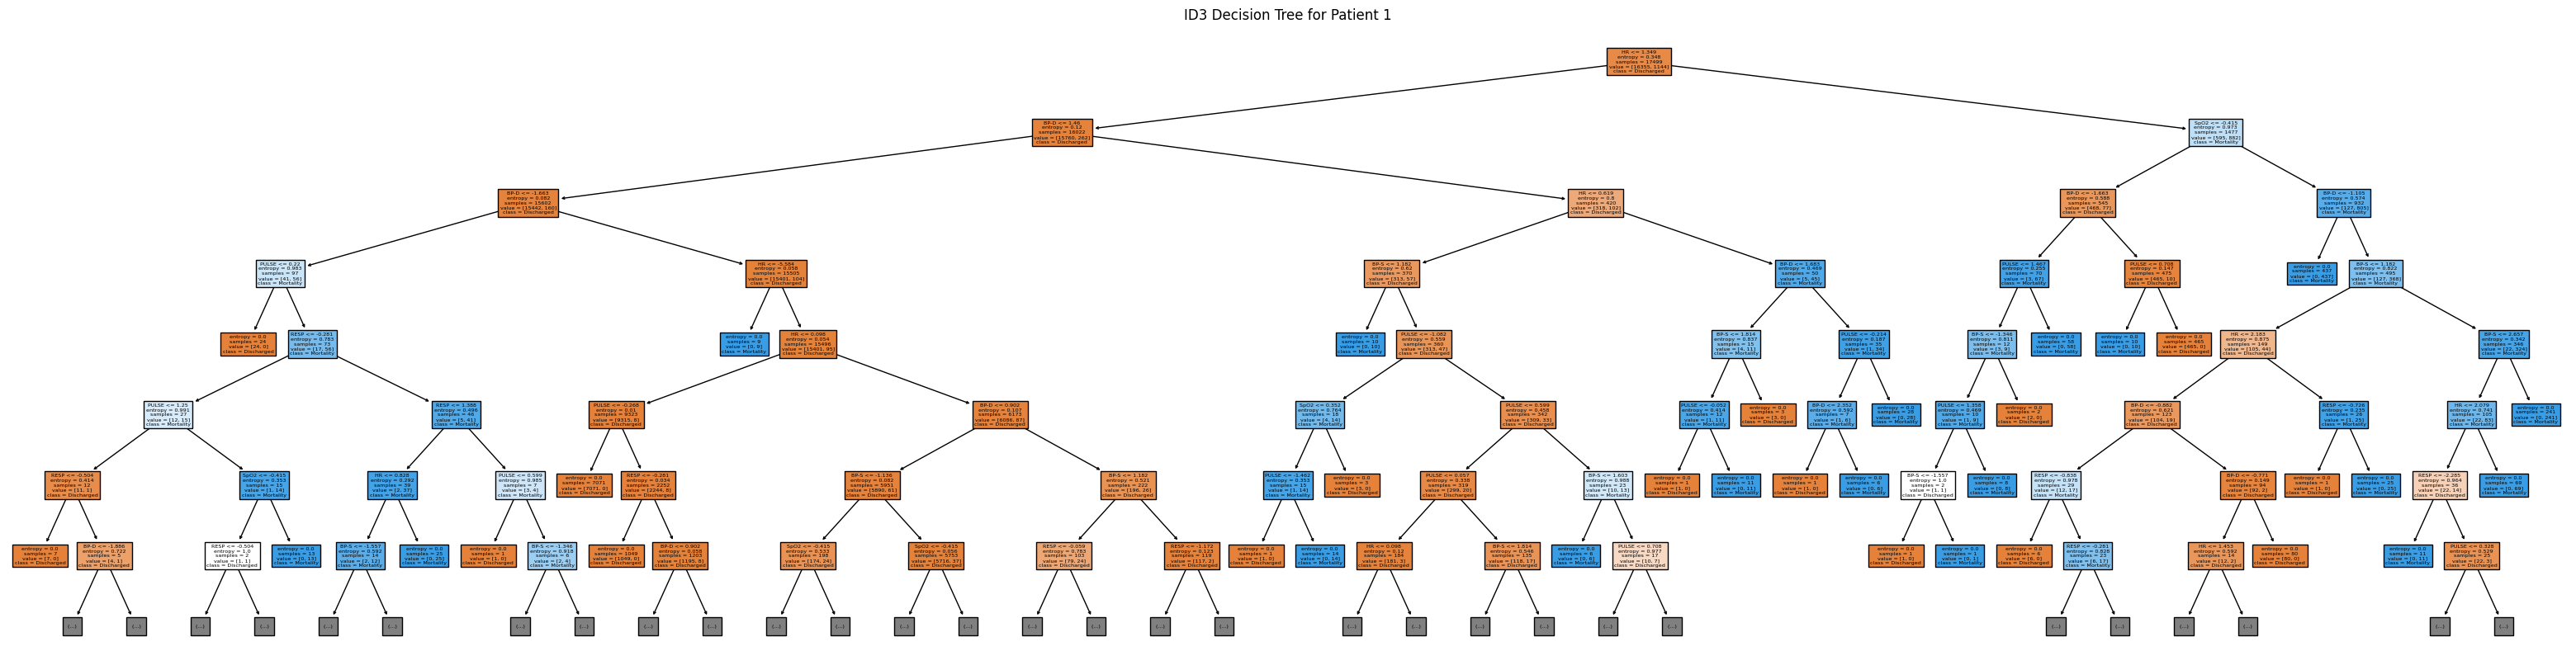

In [11]:
plt.figure(figsize=(40, 10))
plot_tree(id3_1, feature_names=X_1.columns, class_names=['Discharged', 'Mortality'], filled=True, max_depth=7)
plt.title('ID3 Decision Tree for Patient 1')
plt.show()


ID3 Algo Custom Implementation

In [12]:

def entropy(y):
    frequency = np.bincount(y)  # Count occurrences of each label
    probabilities = frequency / len(y)
    entropy_value = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy_value

def information_gain(X_column, y):
    parent_entropy = entropy(y)

    # Calculate the weighted entropy of the children
    values, counts = np.unique(X_column, return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(y[X_column == v]) for i, v in enumerate(values)] )

    # Return IG
    return parent_entropy - weighted_entropy

def best_feature_split(X, y):
    # Calculate information gain for each feature
    information_gains = [information_gain(X.iloc[:, i], y) for i in range(X.shape[1])]
    return X.columns[np.argmax(information_gains)] # Return the name of the best feature

# Tree building
class ID3DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None
        self.y_train = None

    def fit(self, X, y, depth=0):
        self.y_train = y

        # If all target values are the same, return a leaf node
        if len(np.unique(y)) == 1:
            return np.unique(y)[0]

        # If max depth is reached, return the majority class
        if self.max_depth is not None and depth >= self.max_depth:
            return Counter(y).most_common(1)[0][0]

        # If there are no more features to split, return the majority class
        if X.shape[1] == 0:
            return Counter(y).most_common(1)[0][0]

        # Find the best feature to split on
        best_feature = best_feature_split(X, y)
        tree = {best_feature: {}}

        # Split the dataset on the best feature
        feature_values = np.unique(X[best_feature])  # Use the name of the best feature
        for value in feature_values:
            # Create a subset for each split
            subset_X = X[X[best_feature] == value]
            # Use boolean indexing to filter 'y' based on 'X'
            subset_y = y[X[best_feature] == value]
            subtree = self.fit(subset_X.drop(best_feature, axis=1), subset_y, depth + 1)  # Drop the best feature from subset_X
            tree[best_feature][value] = subtree

        return tree

    def predict_instance(self, instance, tree):
      if not isinstance(tree, dict):
          return tree  # It's a leaf node

      feature = list(tree.keys())[0]

      # Check if instance is a DataFrame and convert if necessary
      if not isinstance(instance, pd.DataFrame):
          instance = pd.DataFrame([instance])  # Convert to DataFrame
      if feature in instance.columns:
          feature_value = instance[feature].iloc[0]

          # Traverse the tree using the instance's feature value
          if feature_value in tree[feature]:
              return self.predict_instance(instance, tree[feature][feature_value])

      else:
          return Counter(self.y_train).most_common(1)[0][0]

    def predict(self, X):
        # Ensure X is a DataFrame
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        return [self.predict_instance(X.iloc[i], self.tree) for i in range(len(X))]  # Pass each row as a DataFrame to predict_instance


In [13]:
id3_tree = ID3DecisionTree(max_depth=3)
id3_tree.tree = id3_tree.fit(X_1_train, Y_1_train)

predictions = id3_tree.predict(X_1_test)
accuracy = np.mean(predictions == Y_1_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9669333333333333


Scikit-Learn is faster due to optimized algorithms, while a custom implementation allows more flexibility but at the cost of performance.

#CART Algorithm




CART Algo using scikit learn DecisionTreeClassifier

In [14]:


cart_1 = DecisionTreeClassifier(criterion="gini")
cart_1.fit(X_2_train, Y_2_train)

# Getting the model predictions for the test set
y_2_cart_1_pred = cart_1.predict(X_2_test)

# Calculating the accuracy of the CART decision tree
accuracy_cart_1 = accuracy_score(Y_2_test, y_2_cart_1_pred)
logloss_cart_1 = log_loss(Y_2_test, y_2_cart_1_pred)
print(f"Accuracy: {accuracy_cart_1} and LogLos: {logloss_cart_1}")

Accuracy: 0.9956 and LogLos: 0.1585920749121157


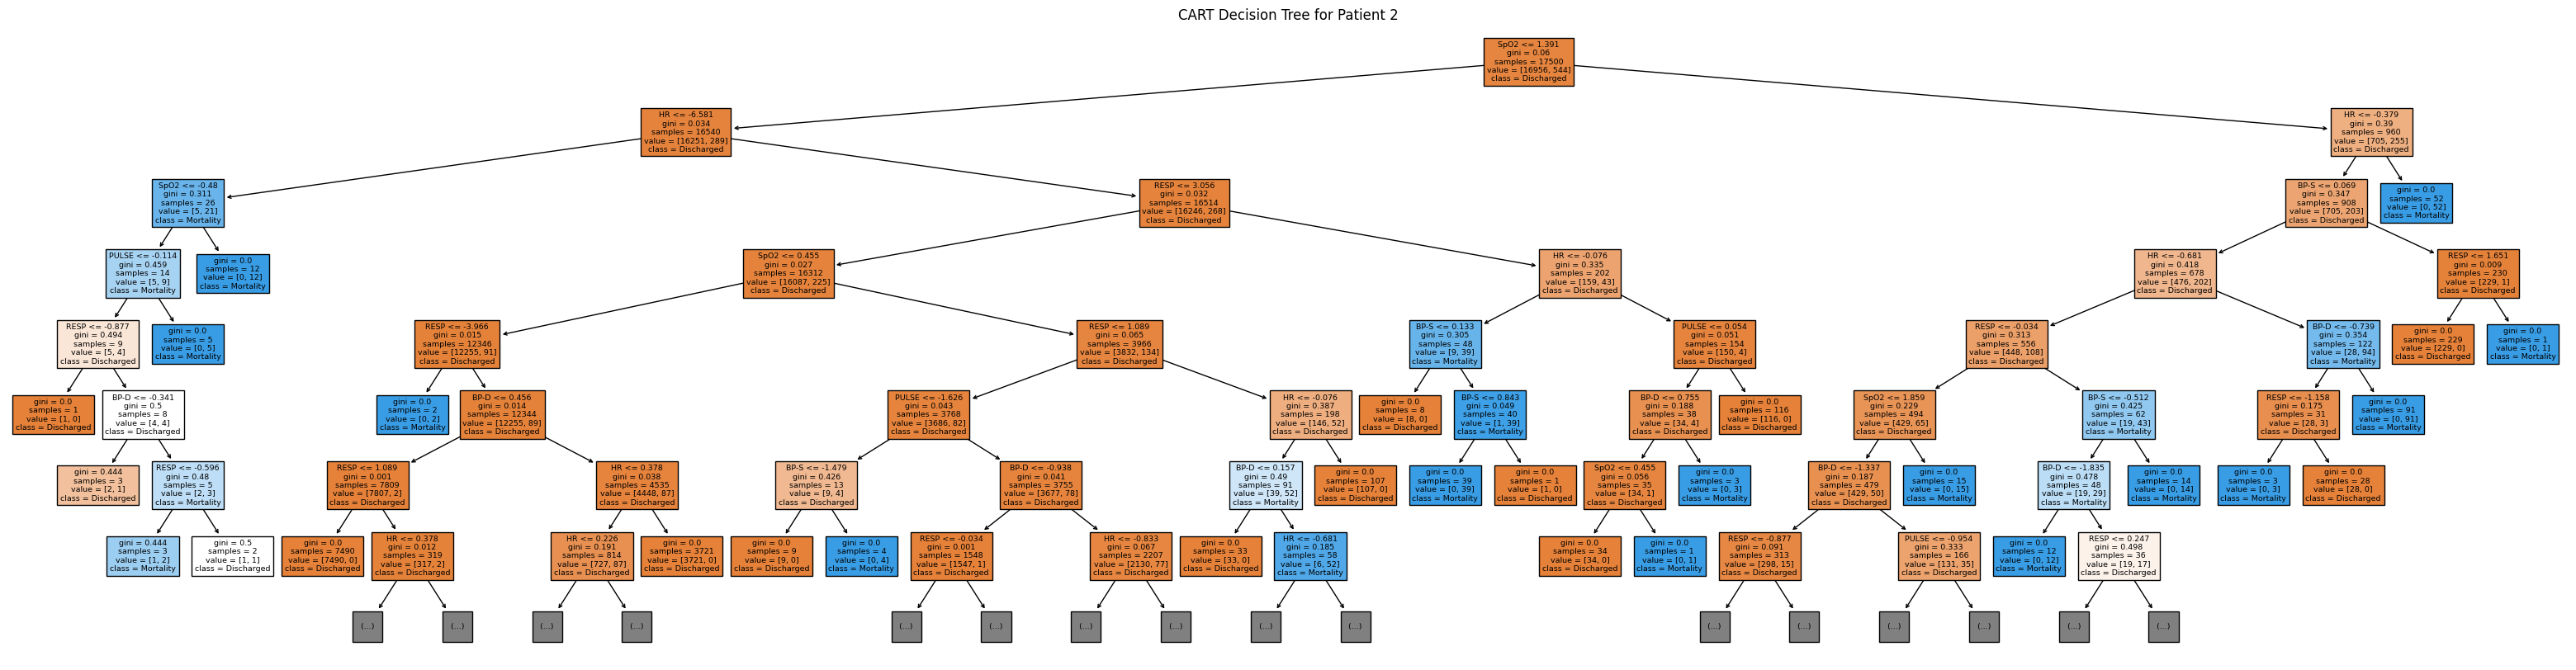

In [15]:
# plot CART tree
plt.figure(figsize=(40, 10))
plot_tree(cart_1, feature_names=X_2.columns, class_names=['Discharged', 'Mortality'], filled=True, max_depth = 7)
plt.title('CART Decision Tree for Patient 2')
plt.show()

CART Algo using the TenserFLow CartModel



In [16]:

cart_2 = tfdf.keras.CartModel()
cart_2.fit(pat_2_tf)

y_2_cart_2_pred = cart_2.predict(pat_2_tf)
# this line is used to convert the probability result of the predicit function to a binary output
y_2_cart_2_pred = np.argmax(y_2_cart_2_pred, axis=1)

accuracy_cart_2 = accuracy_score(pat_2['Anomaly'], y_2_cart_2_pred)
logloss_cart_2 = log_loss(pat_2['Anomaly'], y_2_cart_2_pred)
print(f"Accuracy: {accuracy_cart_2} and Logloss: {logloss_cart_2}")

Use /tmp/tmpgfsb7fkd as temporary training directory
Reading training dataset...
Training dataset read in 0:00:05.824427. Found 25000 examples.
Training model...
Model trained in 0:00:00.120731
Compiling model...
Model compiled.
25/25 [==============================] - 0s 7ms/step
Accuracy: 0.96852 and Logloss: 1.134654208689408


In [17]:
# Split the dataset into features and target
X = pat_2.drop(columns=['Anomaly'])  # Features
y = pat_2['Anomaly']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to TensorFlow format if necessary
pat_2_train_tf = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_train, y_train], axis=1), task=tfdf.keras.Task.CLASSIFICATION, label="Anomaly")
pat_2_test_tf = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_test, y_test], axis=1), task=tfdf.keras.Task.CLASSIFICATION, label="Anomaly")

# Initialize the CART model
cart_model = tfdf.keras.CartModel()

# Train the model
cart_model.fit(pat_2_train_tf)

# Make predictions on the test set
y_test_pred_prob = cart_model.predict(pat_2_test_tf)

# If the model outputs probabilities for two classes, use np.argmax
# For binary classification, this may also be a single probability column
if y_test_pred_prob.shape[1] == 2:
    y_test_pred = np.argmax(y_test_pred_prob, axis=1)
else:
    y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Calculate accuracy and log loss
accuracy = accuracy_score(y_test, y_test_pred)
logloss = log_loss(y_test, y_test_pred_prob)

# Output the results
print(f"Accuracy: {accuracy:.2f} and Logloss: {logloss:.4f}")

Use /tmp/tmpm28q6r9_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.580882. Found 20000 examples.
Training model...
Model trained in 0:00:00.154145
Compiling model...
Model compiled.
5/5 [==============================] - 0s 15ms/step
Accuracy: 0.99 and Logloss: 0.0375


In [18]:
print(type(cart_2))

<class 'tensorflow_decision_forests.keras.CartModel'>


In [19]:
print(cart_2.make_inspector().extract_tree(tree_idx=0))

(SpO2 >= 1.3909213542938232; miss=False, score=0.02323552407324314)
    ├─(pos)─ (HR >= -0.6813064813613892; miss=True, score=0.07520341128110886)
    │        ├─(pos)─ (BP-S >= 0.1333201378583908; miss=False, score=0.11821900308132172)
    │        │        ├─(pos)─ (HR >= -0.3787805438041687; miss=True, score=0.5881016254425049)
    │        │        │    ...
    │        │        └─(neg)─ (BP-D >= -0.739217221736908; miss=True, score=0.46070197224617004)
    │        │             ...
    │        └─(neg)─ (RESP >= 0.24677924811840057; miss=False, score=0.056765686720609665)
    │                 ├─(pos)─ ProbabilityValue([0.08823529411764706, 0.9117647058823529],n=34.0) (idx=47)
    │                 └─(neg)─ (BP-S >= 0.06882453709840775; miss=False, score=0.028895512223243713)
    │                      ...
    └─(neg)─ (SpO2 >= 0.45544570684432983; miss=False, score=0.006210201885551214)
             ├─(pos)─ (RESP >= 0.8085348606109619; miss=False, score=0.04058349132537842)
   

In [20]:
#plot CART tree
#plt.figure(figsize=(12, 8))
tfdf.model_plotter.plot_model_in_colab(cart_2, max_depth=3)
#plt.title('CART using TenserFlow CartModel')
#plt.show()

Scikit-Learn's DecisionTreeClassifier: Highly efficient for smaller to medium-sized datasets due to its C-based optimizations. It works well for quick model training and evaluation with good memory handling.

TensorFlow's CartModel: More optimized for larger datasets, especially when leveraging GPU acceleration, making it suitable for deep learning or distributed environments. It may have higher overhead for small datasets but scales well for complex models.

#Random Forest

In [21]:
#Random forest with cart
rf_1 = tfdf.keras.RandomForestModel()
rf_1.fit(pat_1_tf)

y_1_rf_1_pred = rf_1.predict(pat_1_tf)
# this line is used to convert the probability result of the predicit function to a binary output
y_1_rf_1_pred = np.argmax(y_1_rf_1_pred, axis=1)

accuracy_rf_1 = accuracy_score(pat_1['Anomaly'], y_1_rf_1_pred)
logloss_rf_1 = log_loss(pat_1['Anomaly'], y_1_rf_1_pred)

print(f"Accuracy: {accuracy_rf_1} and Logloss: {logloss_rf_1}")

Use /tmp/tmpc5oufkmk as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.659744. Found 24999 examples.
Training model...
Model trained in 0:00:07.166475
Compiling model...
Model compiled.


25/25 [==============================] - 1s 20ms/step
Accuracy: 0.9343173726949078 and Logloss: 2.367441852271305


In [22]:
print(type(rf_1))

<class 'tensorflow_decision_forests.keras.RandomForestModel'>


In [23]:
rf_1.make_inspector().num_trees()

300

In [24]:

print(rf_1.make_inspector().extract_tree(tree_idx=1))

(HR >= 1.3487799167633057; miss=False, score=0.10576460510492325)
    ├─(pos)─ (BP-D >= -1.4400027990341187; miss=True, score=0.1801808923482895)
    │        ├─(pos)─ (BP-S >= 1.1819696426391602; miss=False, score=0.32720309495925903)
    │        │        ├─(pos)─ (BP-S >= 2.656733751296997; miss=False, score=0.1332440823316574)
    │        │        │    ...
    │        │        └─(neg)─ (PULSE >= 2.009247303009033; miss=False, score=0.09459185600280762)
    │        │             ...
    │        └─(neg)─ (SpO2 >= -0.4149337410926819; miss=True, score=0.04079974442720413)
    │                 ├─(pos)─ ProbabilityValue([0.0, 1.0],n=551.0) (idx=107)
    │                 └─(neg)─ (BP-S >= -1.3461976051330566; miss=True, score=0.17224521934986115)
    │                      ...
    └─(neg)─ (HR >= 0.09775291383266449; miss=False, score=0.008896490558981895)
             ├─(pos)─ (BP-S >= 0.549927830696106; miss=False, score=0.024115988984704018)
             │        ├─(pos)─ (BP-S 

In [25]:
tfdf.model_plotter.plot_model_in_colab(rf_1, tree_idx=0, max_depth=3)
#plt.title('Random Forest using TenserFlow CartModel')
#plt.show()

Scatter plot

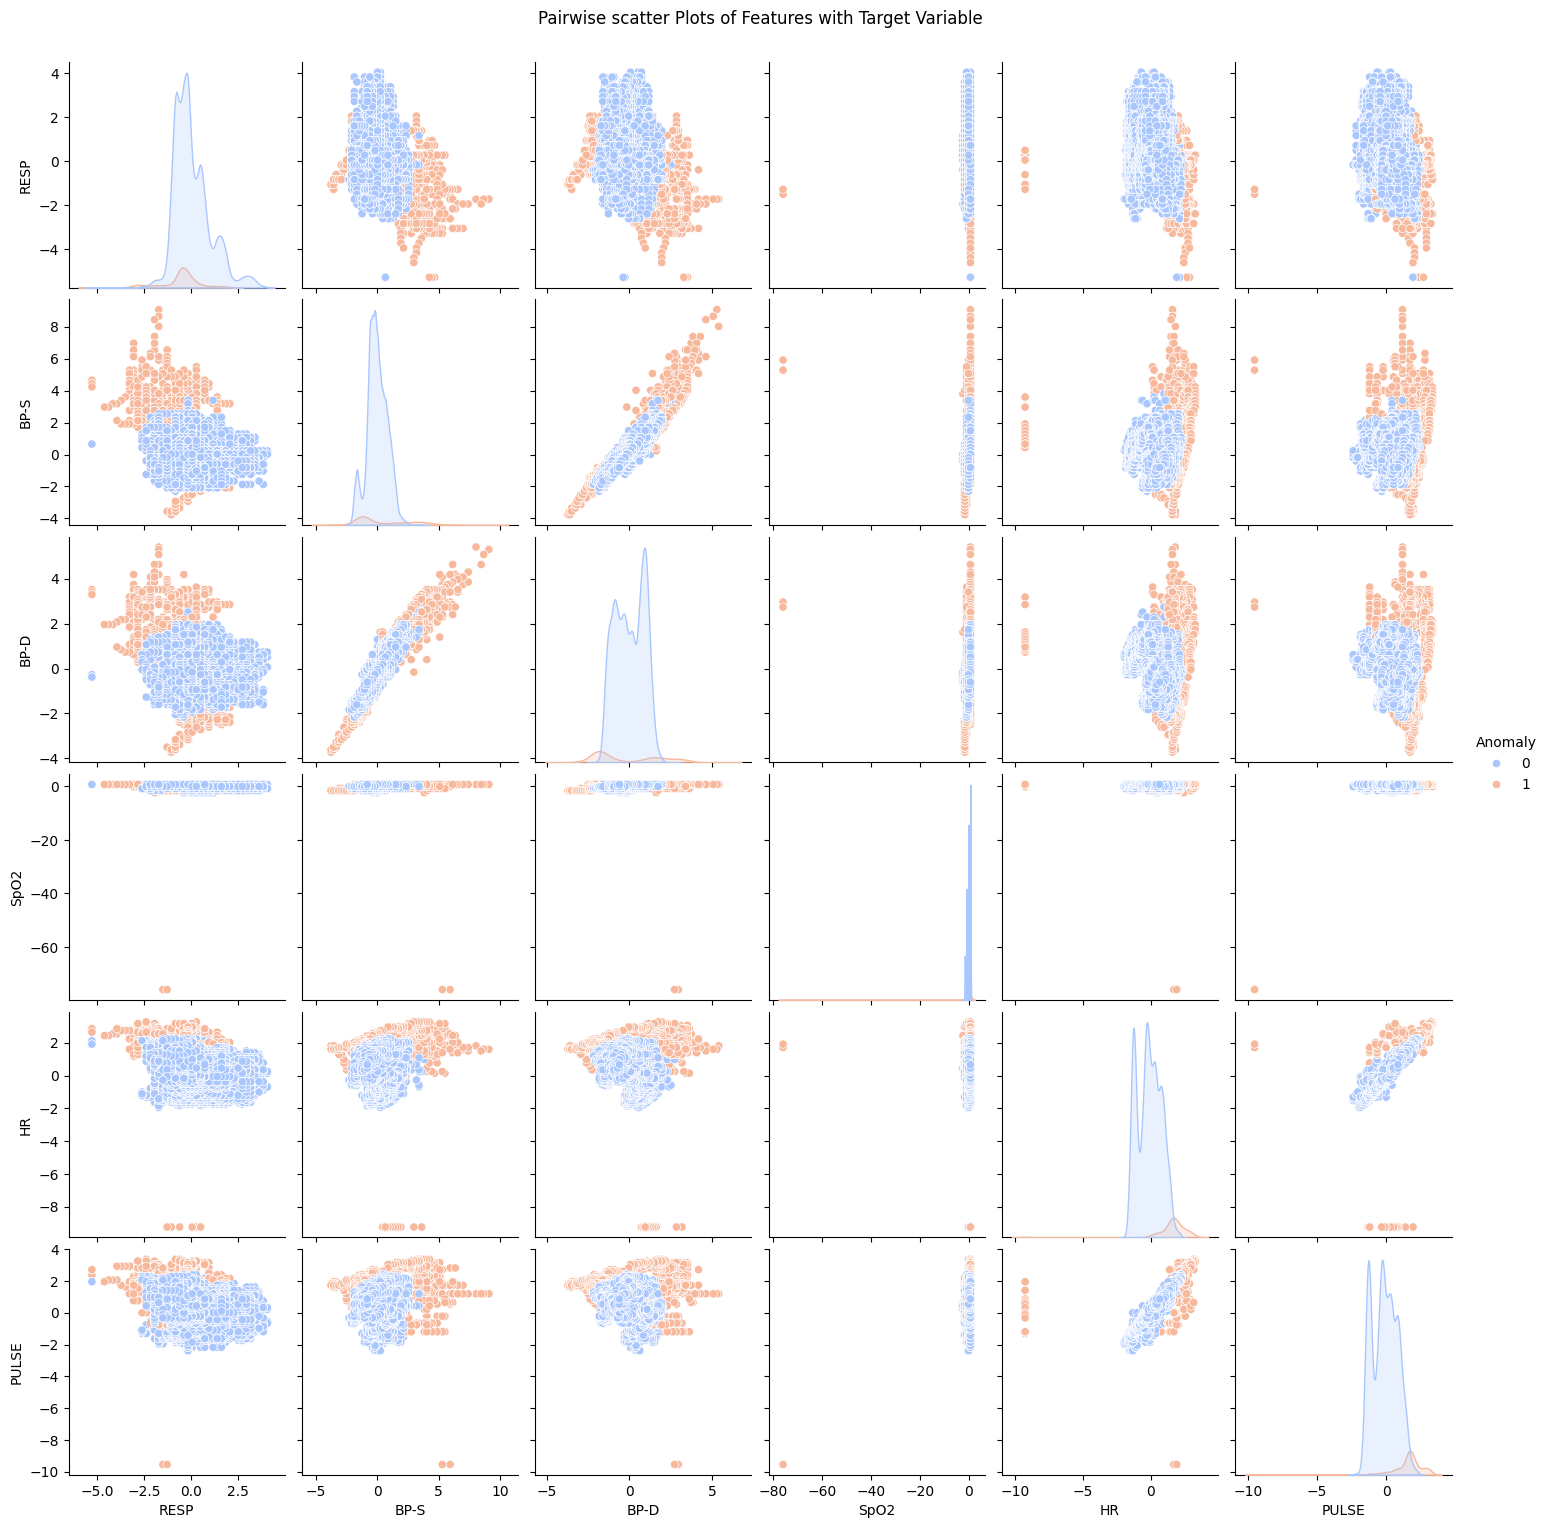

In [26]:

# Create a pair plot (scatter matrix) with hue as 'Anomaly'
sns.pairplot(pat_1, hue='Anomaly', palette='coolwarm', diag_kind='kde')

plt.suptitle('Pairwise scatter Plots of Features with Target Variable', y=1.02)
plt.show()

#Gradient Boosted Decision Tree

Use /tmp/tmpgicicnvz as temporary training directory
Reading training dataset...


Training dataset read in 0:00:01.161922. Found 20000 examples.
Training model...
Model trained in 0:00:00.257985
Compiling model...
Model compiled.


5/5 [==============================] - 0s 14ms/step
Accuracy: 0.9664, Log Loss: 0.08330629274529024
Use /tmp/tmpumfclxn0 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.767319. Found 20000 examples.
Training model...
Model trained in 0:00:00.333594
Compiling model...
Model compiled.
5/5 [==============================] - 0s 15ms/step
Accuracy: 0.9664, Log Loss: 0.06843495145738372
Use /tmp/tmpq2u1q8q0 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.231197. Found 20000 examples.
Training model...
Model trained in 0:00:00.565244
Compiling model...
Model compiled.
5/5 [==============================] - 0s 41ms/step
Accuracy: 0.9664, Log Loss: 0.059314356745762346
Use /tmp/tmpaijzf1ft as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.144746. Found 20000 examples.
Training model...
Model trained in 0:00:00.560630
Compiling model...
Model compiled.
5/5 [=======

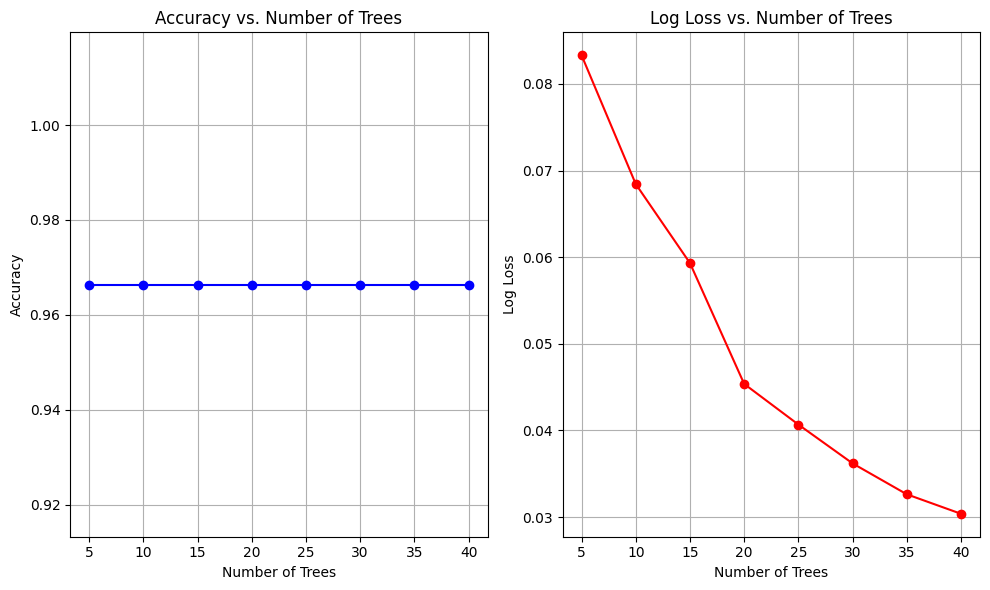

In [29]:
num_trees = [5, 10, 15, 20, 25, 30, 35, 40]
accuracy_gbdt = []
logloss_gbdt = []

for num_tree in num_trees:
    gbdt_model = tfdf.keras.GradientBoostedTreesModel(num_trees=num_tree)
    gbdt_model.fit(pat_2_train_tf)

    # Predict raw probabilities
    y_2_gbdt_pred = gbdt_model.predict(pat_2_test_tf)

    # For accuracy, use class predictions
    y_2_gbdt_pred_class = np.argmax(y_2_gbdt_pred, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_2_gbdt_pred_class)
    accuracy_gbdt.append(accuracy)

    # Calculate log loss using raw probabilities (not class labels)
    logloss = log_loss(y_test, y_2_gbdt_pred)
    logloss_gbdt.append(logloss)

    print(f'Accuracy: {accuracy}, Log Loss: {logloss}')

# Plot the accuracy and logloss graphs
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(num_trees, accuracy_gbdt, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees')
plt.grid(True)

# Logloss plot
plt.subplot(1, 2, 2)
plt.plot(num_trees, logloss_gbdt, marker='o', linestyle='-', color='r', label='Log Loss')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Number of Trees')
plt.grid(True)

plt.tight_layout()
plt.show()


Use /tmp/tmpbc7en8vi as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.314860. Found 20000 examples.
Training model...
Model trained in 0:00:00.090878
Compiling model...
Model compiled.
5/5 [==============================] - 0s 7ms/step
GBDT - Trees: 10, Shrinkage: 0.01, Max Depth: 3 - Accuracy: 0.9686, Log Loss: 0.12950346501725585
Use /tmp/tmpusuvxtpa as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.381614. Found 20000 examples.
Training model...
Model trained in 0:00:00.191554
Compiling model...
Model compiled.
5/5 [==============================] - 0s 11ms/step
GBDT - Trees: 10, Shrinkage: 0.01, Max Depth: 6 - Accuracy: 0.9686, Log Loss: 0.11758047716279525
Use /tmp/tmpf3jut6yh as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.392210. Found 20000 examples.
Training model...
Model trained in 0:00:00.281926
Compiling model...
Model compiled.
5/5 [=========

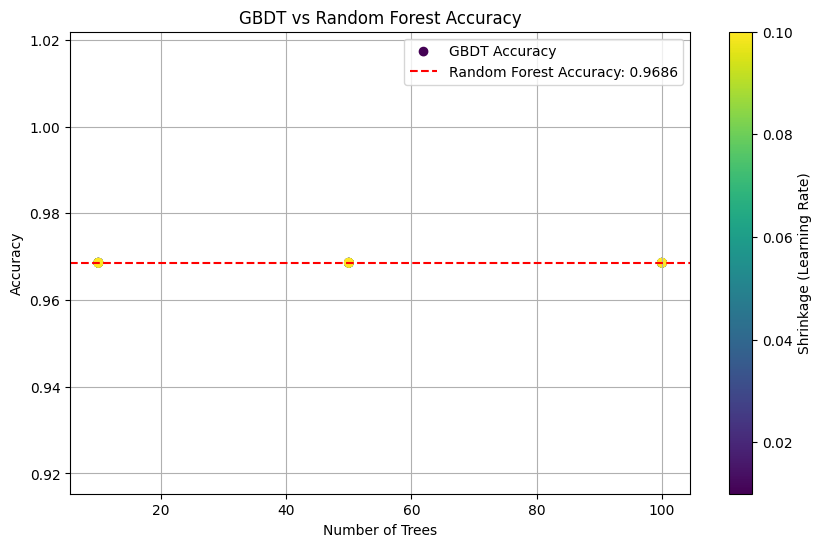

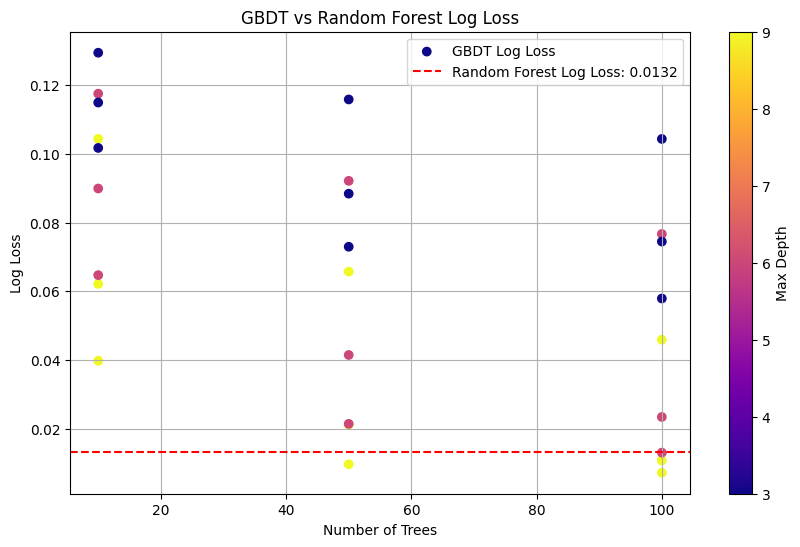

In [30]:

# Split the data into training and validation sets
train_data, val_data = train_test_split(pat_2, test_size=0.2, stratify=pat_2['Anomaly'])

# Convert the data to TensorFlow format
train_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="Anomaly")
val_tf = tfdf.keras.pd_dataframe_to_tf_dataset(val_data, label="Anomaly")


# Define hyperparameters to test
num_trees_list = [10, 50, 100]
shrinkage_list = [0.01, 0.05, 0.1]
max_depth_list = [3, 6, 9]

# Lists to store results
accuracy_gbdt = []
logloss_gbdt = []

# Iterate over the hyperparameters
for num_trees in num_trees_list:
    for shrinkage in shrinkage_list:
        for max_depth in max_depth_list:
            # Create and train the GradientBoostedTrees model with different hyperparameters
            gbdt_model = tfdf.keras.GradientBoostedTreesModel(
                num_trees=num_trees,
                shrinkage=shrinkage,
                max_depth=max_depth
            )
            gbdt_model.fit(train_tf)

            # Predict on validation data
            y_val_pred_gbdt = gbdt_model.predict(val_tf)
            y_val_pred_class_gbdt = np.argmax(y_val_pred_gbdt, axis=1)

            # Calculate accuracy and log loss
            accuracy = accuracy_score(val_data['Anomaly'], y_val_pred_class_gbdt)
            logloss = log_loss(val_data['Anomaly'], y_val_pred_gbdt)

            accuracy_gbdt.append((num_trees, shrinkage, max_depth, accuracy))
            logloss_gbdt.append((num_trees, shrinkage, max_depth, logloss))

            print(f'GBDT - Trees: {num_trees}, Shrinkage: {shrinkage}, Max Depth: {max_depth} - Accuracy: {accuracy}, Log Loss: {logloss}')

# Train a Random Forest model
rf_model = tfdf.keras.RandomForestModel(num_trees=100)
rf_model.fit(train_tf)

# Predict on validation data
y_val_pred_rf = rf_model.predict(val_tf)
y_val_pred_class_rf = np.argmax(y_val_pred_rf, axis=1)

# Calculate accuracy and log loss for Random Forest
accuracy_rf = accuracy_score(val_data['Anomaly'], y_val_pred_class_rf)
logloss_rf = log_loss(val_data['Anomaly'], y_val_pred_rf)

print(f'Random Forest - Accuracy: {accuracy_rf}, Log Loss: {logloss_rf}')


# Visualize Accuracy for GBDT and RF
num_trees_gbdt = [x[0] for x in accuracy_gbdt]
shrinkage_gbdt = [x[1] for x in accuracy_gbdt]
max_depth_gbdt = [x[2] for x in accuracy_gbdt]
accuracy_values = [x[3] for x in accuracy_gbdt]

plt.figure(figsize=(10, 6))
plt.scatter(num_trees_gbdt, accuracy_values, c=shrinkage_gbdt, cmap='viridis', label='GBDT Accuracy')
plt.axhline(y=accuracy_rf, color='r', linestyle='--', label=f'Random Forest Accuracy: {accuracy_rf:.4f}')
plt.colorbar(label='Shrinkage (Learning Rate)')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('GBDT vs Random Forest Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Similarly, plot Log Loss comparison
logloss_values = [x[3] for x in logloss_gbdt]

plt.figure(figsize=(10, 6))
plt.scatter(num_trees_gbdt, logloss_values, c=max_depth_gbdt, cmap='plasma', label='GBDT Log Loss')
plt.axhline(y=logloss_rf, color='r', linestyle='--', label=f'Random Forest Log Loss: {logloss_rf:.4f}')
plt.colorbar(label='Max Depth')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.title('GBDT vs Random Forest Log Loss')
plt.legend()
plt.grid(True)
plt.show()


The Gradient Boosted Trees model is better due to its higher accuracy and lower logloss, indicating better predictive performance and more confidence in its predictions. GBDTs also typically excel in handling complex data patterns over Random Forests. Random Forest, while more stable and less prone to overfitting, may require additional hyperparameter tuning to match GBDT's complex pattern-capturing ability.


Feature importance

In [31]:
# RF model
inspector = rf_1.make_inspector()
feature_importance = inspector.variable_importances()
print(feature_importance)

# GBDT model
inspector = gbdt_model.make_inspector()
feature_importance = inspector.variable_importances()
print(feature_importance)

{'SUM_SCORE': [("HR" (1; #2), 688947.8974352658), ("BP-D" (1; #0), 363191.66613951896), ("PULSE" (1; #3), 285061.63845848717), ("BP-S" (1; #1), 184075.22233936115), ("SpO2" (1; #5), 170395.9406939313), ("RESP" (1; #4), 65529.01704132011)], 'INV_MEAN_MIN_DEPTH': [("HR" (1; #2), 0.4747880702946197), ("BP-D" (1; #0), 0.3759828746665901), ("PULSE" (1; #3), 0.19649985395541467), ("BP-S" (1; #1), 0.18894290220448037), ("SpO2" (1; #5), 0.13516606967488778), ("RESP" (1; #4), 0.12711711726653194)], 'NUM_NODES': [("BP-D" (1; #0), 7137.0), ("BP-S" (1; #1), 6748.0), ("RESP" (1; #4), 6700.0), ("PULSE" (1; #3), 6279.0), ("HR" (1; #2), 6202.0), ("SpO2" (1; #5), 2015.0)], 'NUM_AS_ROOT': [("HR" (1; #2), 199.0), ("PULSE" (1; #3), 86.0), ("BP-D" (1; #0), 15.0)]}
{'SUM_SCORE': [("HR" (1; #2), 563.4670122827924), ("BP-D" (1; #0), 353.52079882909703), ("SpO2" (1; #5), 215.23833391248607), ("RESP" (1; #4), 209.00643946583497), ("BP-S" (1; #1), 184.4206715939305), ("PULSE" (1; #3), 148.04601621177395)], 'NUM_